## Plot Wflow forcing

**HydroMT** provides a simple interface to model forcing data from which we can make beautiful plots:

- Forcing model layers are saved to model `forcing` component as a `dict` of `xarray.DataArray`

### Load dependencies

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import hydromt
from hydromt_wflow import WflowModel

### Read the model

In [3]:
root = "###FILL IN PATH TO MODEL####"
mod = WflowModel(root, config_fn = 'wflow_sbm_hsaf202405.toml',  mode="r")

In [4]:
mod.read()

### Plot model forcing

Here we plot the model *basin average* forcing.

In [8]:
# read wflow forcing; mask region outside the basin and compute the basin average
# NOTE: only very limited forcing data is available from the artifacts
ds_forcing = xr.merge(mod.forcing.values()).where(mod.grid["wflow_subcatch"] > 0)
ds_forcing = ds_forcing.mean(dim=[ds_forcing.raster.x_dim, ds_forcing.raster.y_dim])

In [12]:
mod.forcing['precip']




<xarray.DataArray 'precip' (time: 5665, latitude: 39, longitude: 51)> Size: 45MB
dask.array<open_dataset-precip, shape=(5665, 39, 51), dtype=float32, chunksize=(30, 39, 51), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 45kB 2024-04-01 ... 2024-05-30
  * longitude    (longitude) float64 408B 41.69 41.7 41.7 ... 42.09 42.1 42.1
  * latitude     (latitude) float64 312B 9.762 9.754 9.746 ... 9.462 9.454 9.446
    spatial_ref  int32 4B ...
Attributes:
    precip_fn:  hsaf

In [9]:
# plot axes labels
_ATTRS = {
    "precip": {
        "standard_name": "precipitation",
        "unit": "mm.day-1",
        "color": "darkblue",
    },
    "pet": {
        "standard_name": "potential evapotranspiration",
        "unit": "mm.day-1",
        "color": "purple",
    },
    "temp": {"standard_name": "temperature", "unit": "degree C", "color": "orange"},
}

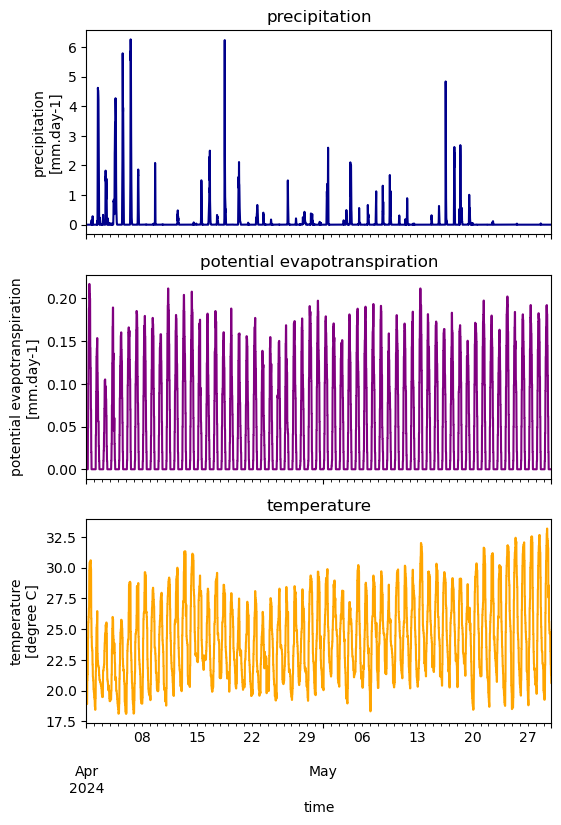

In [17]:
n = len(ds_forcing.data_vars)
kwargs0 = dict(sharex=True, figsize=(6, n * 3))

fig, axes = plt.subplots(n, 1, **kwargs0)
axes = [axes] if n == 1 else axes
for i, name in enumerate(ds_forcing.data_vars):
    df = ds_forcing[name].squeeze().to_series()
    attrs = _ATTRS[name]
    longname = attrs.get("standard_name", "")
    unit = attrs.get("unit", "")
    df.plot.line(ax=axes[i], x="time", color=attrs["color"])
    axes[i].set_title(longname)
    axes[i].set_ylabel(f"{longname}\n[{unit}]")

# save figure
# fn_out = join(mod.root, "figs", "forcing.png")
# plt.savefig(fn_out, dpi=225, bbox_inches="tight")